In [489]:
import numpy as np
import re
import pickle
import gzip

import sys
sys.path.append('/Users/chenwei/Desktop/Github/ViDa') 

import imp, vida.data_processing.utils
imp.reload(vida.data_processing.utils)
from vida.data_processing.utils import *

import imp, vida.adjmat.dp2adj
imp.reload(vida.adjmat.dp2adj)
from vida.adjmat.dp2adj import *

import imp, vida.data_processing.comp_time
imp.reload(vida.data_processing.comp_time)
from vida.data_processing.comp_time import *


## three way

In [490]:
fpath = '/Users/chenwei/Desktop/Github/ViDa//data/raw_data/Machinek-data'
rxn = 'Machinek-PRF'
ref_strands = 'CCCTCCACATTCAACCTCAAACTCACC+TGGTGTTTGTGGGTGTGGTGAGTTTGAGGTTGA+GGTGAGTTTGAGGTTGAATGTGGA'
strand_a = 'CCCTCCACATTCAACCTCAAACTCACC'  # substrate_perf_seq
strand_b = 'TGGTGTTTGTGGGTGTGGTGAGTTTGAGGTTGA'  # incumbent_perf_seq
strand_c = 'GGTGAGTTTGAGGTTGAATGTGGA'  # invader_perf_seq
strand_list = [strand_a, strand_b, strand_c]

ref_name_list = assign_base_names(ref_strands)
ref_name = [item for sublist in ref_name_list for item in sublist]


In [444]:
strand_list

['CCCTCCACATTCAACCTCAAACTCACC',
 'TGGTGTTTGTGGGTGTGGTGAGTTTGAGGTTGA',
 'GGTGAGTTTGAGGTTGAATGTGGA']

In [415]:
# f = open('/Users/chenwei/Desktop/Github/ViDa/data/raw_data/Machinek-data/Machinek-PRF/Machinek-PRF-0.txt', 'r')
# lines = f.read().splitlines()
# part_strand = 'GGTGAGTTTGAGGTTGAATGTGGA'
# seq_line = []
# pattern = re.compile(r'^(.*?)\s+t=([\d.e+-]+) seconds, dG=([-\d.e+]+) kcal/mol')

### read files

In [445]:
trajs_seqs, trajs_states, trajs_times, trajs_energies = read_machinek(fpath,rxn,strand_a,num_files=1)
trajs_seqs.shape, trajs_states.shape

((1, 32898), (1, 32898))

In [446]:
trajs_seqs[0][-10:]

array(['GGTGAGTTTGAGGTTGAATGTGGA+CCCTCCACATTCAACCTCAAACTCACC+TGGTGTTTGTGGGTGTGGTGAGTTTGAGGTTGA',
       'GGTGAGTTTGAGGTTGAATGTGGA+CCCTCCACATTCAACCTCAAACTCACC+TGGTGTTTGTGGGTGTGGTGAGTTTGAGGTTGA',
       'GGTGAGTTTGAGGTTGAATGTGGA+CCCTCCACATTCAACCTCAAACTCACC+TGGTGTTTGTGGGTGTGGTGAGTTTGAGGTTGA',
       'GGTGAGTTTGAGGTTGAATGTGGA+CCCTCCACATTCAACCTCAAACTCACC+TGGTGTTTGTGGGTGTGGTGAGTTTGAGGTTGA',
       'GGTGAGTTTGAGGTTGAATGTGGA+CCCTCCACATTCAACCTCAAACTCACC+TGGTGTTTGTGGGTGTGGTGAGTTTGAGGTTGA',
       'GGTGAGTTTGAGGTTGAATGTGGA+CCCTCCACATTCAACCTCAAACTCACC+TGGTGTTTGTGGGTGTGGTGAGTTTGAGGTTGA',
       'GGTGAGTTTGAGGTTGAATGTGGA+CCCTCCACATTCAACCTCAAACTCACC+TGGTGTTTGTGGGTGTGGTGAGTTTGAGGTTGA',
       'GGTGAGTTTGAGGTTGAATGTGGA+CCCTCCACATTCAACCTCAAACTCACC+TGGTGTTTGTGGGTGTGGTGAGTTTGAGGTTGA',
       'GGTGAGTTTGAGGTTGAATGTGGA+CCCTCCACATTCAACCTCAAACTCACC+TGGTGTTTGTGGGTGTGGTGAGTTTGAGGTTGA',
       'TGGTGTTTGTGGGTGTGGTGAGTTTGAGGTTGA GGTGAGTTTGAGGTTGAATGTGGA+CCCTCCACATTCAACCTCAAACTCACC'],
      dtype=object)

### preprocess

In [491]:
dp_arr, dp_og, pair, energy, trans_time = concat_machinek(trajs_states, trajs_times, trajs_energies)
dp_uniq, dp_og_uniq, pair_uniq, energy_uniq, indices_uniq, indices_all = get_uniq(dp_arr, dp_og, pair, energy)
adj_uniq, seqlabel_uniq = sim_adj_3strand_uniq(dp_arr, trajs_seqs, ref_name, ref_name_list, strand_list, indices_uniq)    

#### adj_uqni debug

In [493]:
dp_arr.shape, dp_arr[0].shape, trajs_seqs.shape, len(trajs_seqs[0]), adj_uniq.shape, seqlabel_uniq.shape, indices_all.shape

((1, 32898), (32898,), (1, 32898), 32898, (984, 84, 84), (984,), (32898,))

In [495]:
la = 980
lb = la+10

seqlabel_uniq[la:lb], dp_og_uniq[la:lb]

(array(['GGTGAGTTTGAGGTTGAATGTGGA TGGTGTTTGTGGGTGTGGTGAGTTTGAGGTTGA+CCCTCCACATTCAACCTCAAACTCACC',
        'GGTGAGTTTGAGGTTGAATGTGGA TGGTGTTTGTGGGTGTGGTGAGTTTGAGGTTGA+CCCTCCACATTCAACCTCAAACTCACC',
        'GGTGAGTTTGAGGTTGAATGTGGA TGGTGTTTGTGGGTGTGGTGAGTTTGAGGTTGA+CCCTCCACATTCAACCTCAAACTCACC',
        'TGGTGTTTGTGGGTGTGGTGAGTTTGAGGTTGA GGTGAGTTTGAGGTTGAATGTGGA+CCCTCCACATTCAACCTCAAACTCACC'],
       dtype=object),
 array(['........................ ................((((((((.((((((((+..........)))))))).))))))))',
        '........................ .................((((((((((((((((+..........)))))))))))))))).',
        '........................ .................(((((((((((((((.+...........))))))))))))))).',
        '................................. .((((((((((((((((((((((.+....)))))))))))))))))))))).'],
       dtype=object))

In [496]:
dp_og_uniq[-1], adj_uniq[-1]

('................................. .((((((((((((((((((((((.+....)))))))))))))))))))))).',
 array([[0, 1, 0, ..., 0, 0, 0],
        [1, 0, 1, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 1, 0, 1],
        [0, 0, 0, ..., 0, 1, 0]]))

In [497]:
dp_og_uniq[-1], dp_uniq[-1], seqlabel_uniq[-1]

('................................. .((((((((((((((((((((((.+....)))))))))))))))))))))).',
 '..................................((((((((((((((((((((((.....)))))))))))))))))))))).',
 'TGGTGTTTGTGGGTGTGGTGAGTTTGAGGTTGA GGTGAGTTTGAGGTTGAATGTGGA+CCCTCCACATTCAACCTCAAACTCACC')

In [ ]:
"""
## TEST 1
## Calculate the adjacency matrix for the individual structure ##

"""
dp_structure = dp_uniq[-1]

alter_name_arr = concat_disorder(trajs_seqs[0],ref_name_list, strand_list)

alter_name_arr_test = alter_name_arr[-1]

alter_name = np.concatenate(alter_name_arr_test)

dplast = dp2adj_3strand(ref_name, alter_name, alter_name_arr_test, dp_structure)
dplast

In [ ]:
"""
## TEST 2
## Calculate the whole adjacency matrix than compared with uniq ones ##

"""
dppmat = sim_adj_3strand(dp_arr, trajs_seqs, ref_name, ref_name_list, strand_list)
dppmat_uniq = dppmat[indices_uniq]

np.all(adj_uniq == dppmat_uniq)

### UNCHANGE

### collect time

In [6]:
hold_time, trj_id = sim_ht(trans_time)
hold_time_uniq = mean_holdingtime(hold_time, indices_uniq, indices_all)
cum_time_uniq,freq_uniq = cumu_holdingtime(hold_time, indices_uniq, indices_all)


### dp to adj

In [ ]:
adj_uniq = sim_adj_3strand_uniq(dp_arr, trajs_seqs, ref_name, ref_name_list, strand_list, indices_uniq)    


In [43]:
combined_array = np.concatenate(adj, axis=0)
combined_array.shape

(441, 72, 72)

## Draw

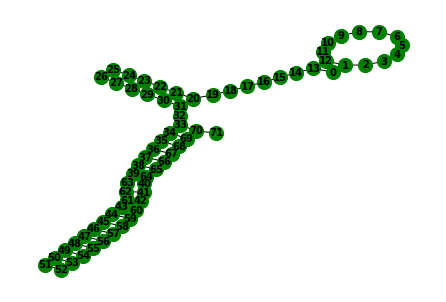

In [60]:
import networkx as nx

import matplotlib.pyplot as plt

# Create a graph from the adjacency matrix
G = nx.Graph(adj[10])

# Draw the graph
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos=nx.kamada_kawai_layout(G), with_labels=True, font_weight='bold', node_size=200, node_color='green', font_size=10, font_color='black')
# nx.draw(G, with_labels=True, font_weight='bold', node_size=200, node_color='green', font_size=10, font_color='black')


# Show the plot
plt.show()


### Debug

In [2]:
import numpy as np
import re
import pickle
import gzip

import sys
sys.path.append('/Users/chenwei/Desktop/Github/ViDa') 

import imp, vida.data_processing.utils
imp.reload(vida.data_processing.utils)
from vida.data_processing.utils import *

import imp, vida.adjmat.dp2adj
imp.reload(vida.adjmat.dp2adj)
from vida.adjmat.dp2adj import *

import imp, vida.data_processing.comp_time
imp.reload(vida.data_processing.comp_time)
from vida.data_processing.comp_time import *


/var/folders/z9/3zs_cg3x09n1q9fmthyx2x600000gn/T/ipykernel_2659/704395099.py:9: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp, vida.data_processing.utils


In [12]:
inpath = '../data/post_data/Machinek-PRF/preprocess_Machinek-PRF.npz'
loaded_data = np.load(inpath, allow_pickle=True)
dp_uniq = loaded_data['dp_uniq']
dp_arr = loaded_data['dp_arr']
indices_uniq = loaded_data['indices_uniq']
indices_all = loaded_data['indices_all']
trans_time = loaded_data["trans_time"]
dp_og_uniq = loaded_data["dp_og_uniq"]

inpath2 = '../data/post_data/Machinek-PRF/Machinek-PRF.pkl.gz'
with gzip.open(inpath2, 'rb') as file:
    load_data_seq = pickle.load(file)
trajs_seqs = load_data_seq["trajs_seqs"]
ref_name = load_data_seq["ref_name"]
ref_name_list = load_data_seq["ref_name_list"]
strand_list = load_data_seq["strand_list"]
trajs_energies = load_data_seq['trajs_energies']

In [20]:
inpath3 = '../data/post_data/Machinek-PRF/adjmat_Machinek-PRF.npz'
loaded_data3 = np.load(inpath3, allow_pickle=True)
adj_uniq = loaded_data3['adj_uniq']
seqlabel_uniq = loaded_data3['seqlabel_uniq']
adj_uniq.shape, seqlabel_uniq.shape

((62883, 84, 84), (62883,))

In [16]:
inpath4 = '../data/post_data/Machinek-PRF/time_Machinek-PRF.npz'
loaded_data4 = np.load(inpath4, allow_pickle=True)
trj_id = loaded_data4['trj_id']

trj_id.shape

(224,)

In [25]:
# Function to replace multiple long strings with their short notations
def replace_strings(s):
    s = s.replace("GGTGAGTTTGAGGTTGAATGTGGA", "invader")
    s = s.replace("TGGTGTTTGTGGGTGTGGTGAGTTTGAGGTTGA", "incumbent")
    s = s.replace("CCCTCCACATTCAACCTCAAACTCACC", "substrate")
    return s

vectorized_replace = np.vectorize(replace_strings)

arr_short = vectorized_replace(seqlabel_uniq)

arr_short

array(['substrate+incumbent+invader', 'substrate+incumbent+invader',
       'substrate+incumbent+invader', ..., 'incumbent substrate+invader',
       'incumbent substrate+invader', 'incumbent substrate+invader'],
      dtype='<U27')

In [32]:
set(arr_short)

{'incumbent invader+substrate',
 'incumbent substrate+invader',
 'incumbent+substrate invader',
 'incumbent+substrate+invader',
 'invader incumbent+substrate',
 'invader substrate+incumbent',
 'invader+incumbent+substrate',
 'invader+substrate+incumbent',
 'substrate+incumbent invader',
 'substrate+incumbent+invader'}

### PCA Variance

In [42]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [54]:
# Load embeddings

TNAME = '24-0214-2008'
CKPT = 'checkpoint_epoch_39'
# CKPT = 'model'

inpath5 = f'../data/post_data/Machinek-PRF/model_config/{TNAME}/embed_{CKPT}_Machinek-PRF.npz'
loaded_data5 = np.load(inpath5, allow_pickle=True)
embeddings = loaded_data5['embeddings']
embeddings.max(), embeddings.min(), embeddings.mean(), embeddings.std()

(10.2237625, -9.186864, 0.24467638, 2.0874054)

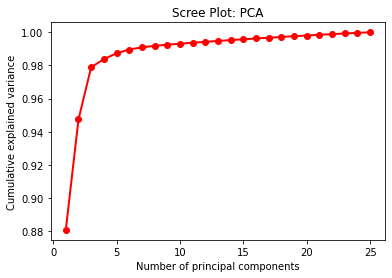

[0.8808663  0.94744277 0.97890013 0.98379415 0.98729295 0.98959684
 0.99086934 0.99179685 0.9924845  0.99311364 0.9936789  0.99421626
 0.9947471  0.99526256 0.9957577  0.99623847 0.99670523 0.99715775
 0.99760324 0.9980338  0.9984553  0.9988621  0.9992521  0.9996343
 0.99999994]


In [58]:
cm = PCA(n_components=25)
cm.fit(embeddings)

PC_values = np.arange(cm.n_components_) + 1
plt.plot(PC_values, np.cumsum(cm.explained_variance_ratio_), 'ro-', linewidth=2)
plt.title('Scree Plot: PCA')
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance');
# plt.xticks(np.arange(0, data_embed.shape[-1]+1, 1))

plt.show()

print(np.cumsum(cm.explained_variance_ratio_))